In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('summary.csv')

In [3]:
df.at[0, 'unroll'] = 1
baseline = df.iloc[0]
print(baseline)

status                             ok
unroll                              1
bench          baseline:gemm-baseline
bram_used                          44
dsp_used                            3
lut_used                         1535
lutmem_used                       137
reg_used                         2642
uram_used                           0
runtime_avg                   10.4164
runtime_std                0.00853253
Name: 0, dtype: object


In [4]:
info_keys = [ 
    'unroll',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

In [5]:
normalized_df = df.copy()
for key in keys:
    norm_val = baseline[key]
    normalized_df[key] = normalized_df[key].apply(lambda v: v / norm_val)
normalized_df = normalized_df[info_keys + keys]
print(normalized_df)

    unroll  lut_used  lutmem_used  bram_used  dsp_used  reg_used  runtime_avg
0      1.0  1.000000     1.000000   1.000000       1.0  1.000000     1.000000
1      4.0  1.156352     0.919708   1.113636       4.0  1.065481     0.654566
2      5.0  1.367427     0.919708   1.113636       5.0  1.073051     0.722585
3     14.0  1.630619     0.919708   1.113636      14.0  1.356548     0.653502
4     15.0  1.934853     0.919708   1.113636      11.0  1.326646     0.678971
5     16.0  1.468404     0.919708   1.113636      16.0  1.459122     0.653438
6      6.0  1.270358     0.919708   1.113636       6.0  1.132097     0.653110
7      7.0  1.527687     0.919708   1.113636       7.0  1.109008     0.702938
8      8.0  1.231922     0.919708   1.113636       8.0  1.150643     0.654538
9      9.0  1.695765     0.919708   1.113636       9.0  1.238077     0.697819
10    10.0  1.474919     0.919708   1.113636      10.0  1.263058     0.647229
11    11.0  1.812378     0.919708   1.113636      11.0  1.306964

In [6]:
long = pd.melt(normalized_df, id_vars=['unroll'], var_name='metrics', value_name='values')
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
unroll     84 non-null float64
metrics    84 non-null object
values     84 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


Text(0, 0.5, 'Unrolling Factor')

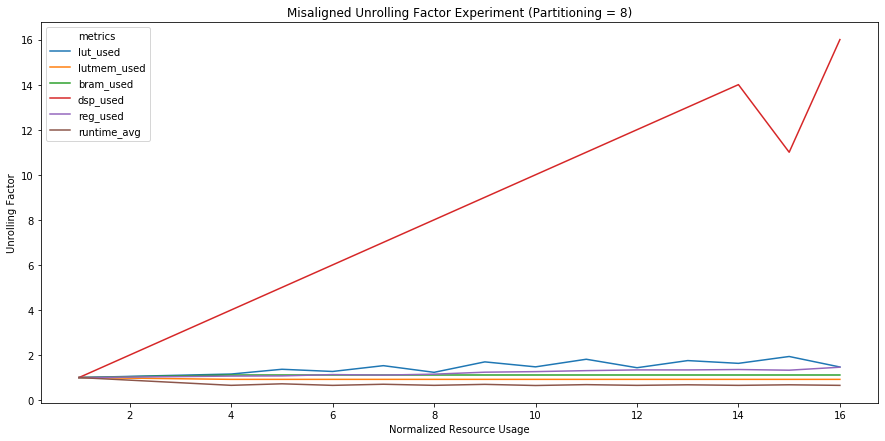

In [7]:
plt.figure(figsize=(15, 7))
plot = sns.lineplot(x='unroll', y='values', hue='metrics', data=long)
plot.set_title('Misaligned Unrolling Factor Experiment (Partitioning = 8)')
plot.set_xlabel('Normalized Resource Usage')
plot.set_ylabel('Unrolling Factor')

In [8]:
plot.figure.savefig('normalized_resources.png', dpi=300)

lut_used
0 3 0 0
lutmem_used
1 3 0 1
bram_used
2 3 0 0
dsp_used
3 3 1 1
reg_used
4 3 1 0
runtime_avg
5 3 1 1


Text(0.5, 0.07, 'Misalgined Unrolling (Partitioning = 8) - Absolute Resource Usages')

<Figure size 432x288 with 0 Axes>

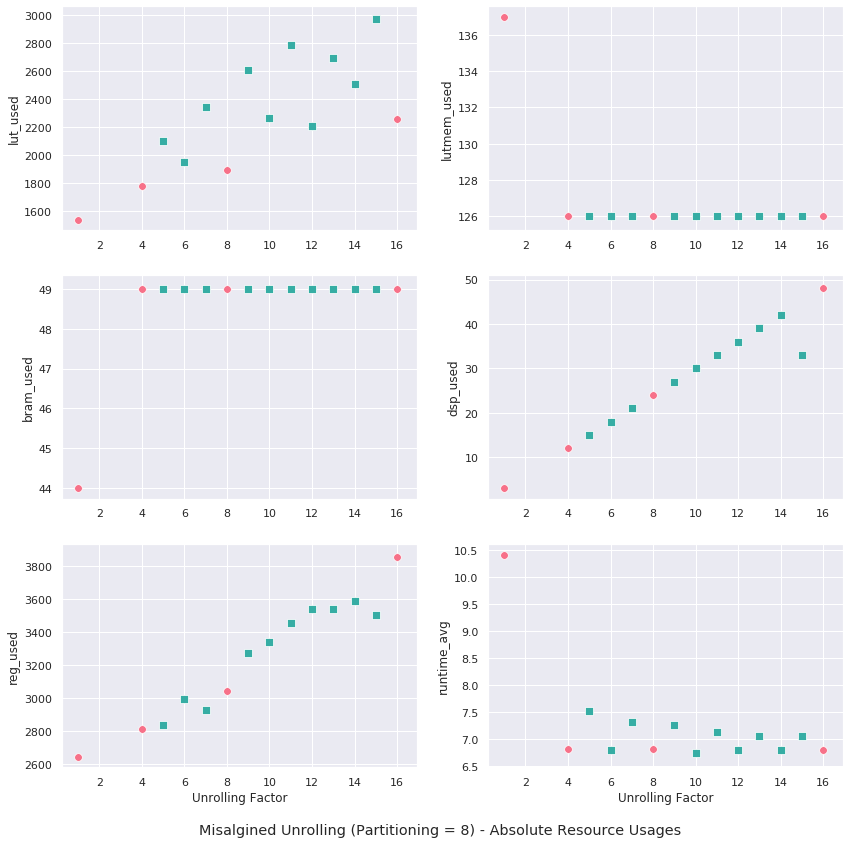

In [9]:
import math
plt.figure()
sns.set()

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14))
pal = sns.color_palette('husl', 8)

for idx, key in enumerate(keys):
    print(key)
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    print(idx, rows, int(idx / rows), idx % cols)
    # Manually add each point to the current scatter plot.
    # This lets us control the color and shape of point.
    for i in range(len(df['unroll'])):
        x = df['unroll'][i]
        (mark, col) = ('o', pal[0]) if 128 % x == 0 else ('s', pal[4])
        sns.scatterplot(x=[x], y=[df[key][i]], marker=mark, s=20*3, color=col, ax=ax)
        ax.set_ylabel(key)
        
for col in range(cols):
    axes[rows - 1, col].set(xlabel='Unrolling Factor')
    
fig.suptitle('Misalgined Unrolling (Partitioning = 8) - Absolute Resource Usages', y=0.07)

In [10]:
fig.savefig('absolute.png', dpi=300)